# Introduction to Python Numerics with NumPy

NumPy homepage: http://www.numpy.org


Things to keep in mind:
* as an interpreted language, python for-loops are ***very slow***
* however, it has a strong following in the numerical scientific community! How?
* thanks to the extremely performat *NumPy* library!

## What does NumPy provide?

* a powerful data structure called the *NDArray*, which is a flexible n-dimensional array
* a set of functions that operate on *NDArrays* in an efficient manner
* the concept of "vector operations", operating on many elements at once, avoiding for-loops
* tools for integrating C/C++ and Fortran code
* useful linear algebra, Fourier transform, and random number capabilities

NumPy is used to build nearly all other scientific python libraries. In paricular it's sister project *SciPy* provides scientific functionality on top of NumPy (that will be covered later)

## the power of NumPy
* It makes writing sometimes very complex operations much simpler and more compact
* the library is implemented in C, and even uses ***blas*** internally
 * blas is a standard for linear algebra operations
 * blas has many ultra-optimized implementations, that are tailored to each CPU (you cannot make linear algebra faster by hand!)
 * by default NumPy is linked with <a href="http://math-atlas.sourceforge.net">atlas</a> or Intel's <a href="https://software.intel.com/en-us/intel-mkl"> ***Math Kernel Library (MKL)*** </a> on Anaconda based systems, which uses every fancy feature of Intel CPUs, including multithreading, etc
* for this reason it is often as fast or faster than hand-coded C code!
 
----------

## The NumPy NDArray: a quick start

### converting from lists to NDArrays:

In [1]:
# first import numpy (it's customary to avoid typing numpy by aliasing it to "np")
import numpy as np  
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
mydata = [1.3, 3.5, 6.3, 1.2, 1.2, 7.9, 7,8, 1.0]
arr = np.array(mydata)
print(arr)
print(arr.dtype)

[ 1.3  3.5  6.3  1.2  1.2  7.9  7.   8.   1. ]
float64


looks somewhat similar to a list, but it is vastly different:
* NDArrays can have only a single data type called the "dtype" (so you can't mix floats32 with int64 for example)
* NDArrays are stored contiguously in memory
* you can specify a dtype when constructing it, and also change between dtypes:

In [3]:
farr = np.array(mydata, dtype=np.float16)
print("original version:", arr)
print("float16 version : ", farr)  # note we lost precision!
print("  int32 version : ", arr.astype(np.int32)) # casting with astype()

original version: [ 1.3  3.5  6.3  1.2  1.2  7.9  7.   8.   1. ]
float16 version :  [ 1.29980469  3.5         6.30078125  1.20019531  1.20019531  7.8984375   7.
  8.          1.        ]
  int32 version :  [1 3 6 1 1 7 7 8 1]


### Inspect the attribues of an NDArray
* **dtype**: the data type
* **size**: the total number of elements (see later when we use more than 1D)
* **shape**: the length of each dimension
* **ndim**: the number of dimensions

In [4]:
print(arr.dtype)
print(arr.ndim)
print(arr.size)
print(arr.shape)

float64
1
9
(9,)


In [5]:
a2d = np.array( [[1,2,3],[4,5,6]])
a2d

array([[1, 2, 3],
       [4, 5, 6]])

In [6]:
print(a2d.ndim ,  "dimensions")
print(a2d.size , "elements")
print(a2d.shape, "shape")

2 dimensions
6 elements
(2, 3) shape


#### create 1D NDArrays without lists

In [7]:
np.arange(100) # integer counter by default

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
       68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84,
       85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99])

In [8]:
np.arange(50, 100, 3)

array([50, 53, 56, 59, 62, 65, 68, 71, 74, 77, 80, 83, 86, 89, 92, 95, 98])

note that arange works like `range()`, and the final value is not included.

Often you want to specify the number of steps to take, rather than the step size (e.g. when plotting, etc). For that, `linspace`  or `logspace` are more useful

In [9]:
x = np.linspace(0,100,10.0)
print("x=",x)

E = np.logspace(-1, 2, 10) # make energy bins in log space!
print("E=",E)

x= [   0.           11.11111111   22.22222222   33.33333333   44.44444444
   55.55555556   66.66666667   77.77777778   88.88888889  100.        ]
E= [   0.1           0.21544347    0.46415888    1.            2.15443469
    4.64158883   10.           21.5443469    46.41588834  100.        ]


### Arithmatic
operate on all elements at once (all arrays must have the same dimensionality (sort of, see broadcasting later)Ar

In [10]:
x = np.linspace(-10,10,11)
y = np.array([1,1,2,2,3,3,2,2,1,1,1,])
x , y 

(array([-10.,  -8.,  -6.,  -4.,  -2.,   0.,   2.,   4.,   6.,   8.,  10.]),
 array([1, 1, 2, 2, 3, 3, 2, 2, 1, 1, 1]))

In [11]:
x**2

array([ 100.,   64.,   36.,   16.,    4.,    0.,    4.,   16.,   36.,
         64.,  100.])

In [12]:
x + 3*x/2

array([-25., -20., -15., -10.,  -5.,   0.,   5.,  10.,  15.,  20.,  25.])

In [13]:
x * y

array([-10.,  -8., -12.,  -8.,  -6.,   0.,   4.,   8.,   6.,   8.,  10.])

### Indexing:

In [14]:
x[0] # first element (like in C)

-10.0

In [15]:
x[3]  # nth element

-4.0

In [16]:
x[-1]  # last element! (same as x[10], but you don't need to know the length)

10.0

In [17]:
x[0:4] # slice of the array from elements 0-3

array([-10.,  -8.,  -6.,  -4.])

In [18]:
x[0:4:2] # same, but every 2 elements

array([-10.,  -6.])

In [19]:
x[::-1] # reversed array! 

array([ 10.,   8.,   6.,   4.,   2.,   0.,  -2.,  -4.,  -6.,  -8., -10.])

this last one is actually quite interesting if you know the internal implementation: it takes no extra memory and all operations should be identical speed to the forward array...

### masking (selecting sets of elements)
#### standard (boolean) masking:

In [20]:
mask = x > 4
mask

array([False, False, False, False, False, False, False, False,  True,
        True,  True], dtype=bool)

In [21]:
x[mask]  # apply boolean mask to return only the elements

array([  6.,   8.,  10.])

***important***: masking in general returns a *view* of the array (e.g. the elements still point to the same data!.  This is useful since you can modify it, modifying the original array!

In [22]:
x[mask] = 99  # assign to those e
x

array([-10.,  -8.,  -6.,  -4.,  -2.,   0.,   2.,   4.,  99.,  99.,  99.])

you could do more powerful things like:

In [23]:
x = np.linspace(0,10,21)
print(x)
x[(x>2) & (x<6)] = -1
print(x)

[  0.    0.5   1.    1.5   2.    2.5   3.    3.5   4.    4.5   5.    5.5
   6.    6.5   7.    7.5   8.    8.5   9.    9.5  10. ]
[  0.    0.5   1.    1.5   2.   -1.   -1.   -1.   -1.   -1.   -1.   -1.
   6.    6.5   7.    7.5   8.    8.5   9.    9.5  10. ]


#### Fancy Indexing
fancy indexing is using a list of element indices as a mask, rather than a boolean. It can sometimes be slower than boolean masking, since the CPU cannot use vector optimizations on it, but it takes less memory

In [24]:
elements = [0,6,7]
x[elements]

array([ 0., -1., -1.])

### create n-dimensional arrays

In [25]:
y = np.ones(10)  # you can also use ones_like(another_array) to use the same shape
print(y)
z = np.zeros(10)
print(z)
r = np.random.uniform(10, size=10) # random numbers in a uniform distribution with max 10
print(r)
rg = np.random.normal(loc=0.0, scale=1.0, size=10) # gaussian samples
print(rg)

[ 1.  1.  1.  1.  1.  1.  1.  1.  1.  1.]
[ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
[ 3.06327932  3.6286895   8.69051703  8.23102893  2.1218365   6.26777833
  5.03192455  6.6052472   8.99585201  5.15963203]
[ 1.5042185  -0.74468331 -0.84709052 -1.46851298  1.02153859  1.5149473
  1.39768467  2.12317941  1.33571981 -0.33323307]


In [26]:
np.ones(shape=(5,3))  # most accept a shape attribute

array([[ 1.,  1.,  1.],
       [ 1.,  1.,  1.],
       [ 1.,  1.,  1.],
       [ 1.,  1.,  1.],
       [ 1.,  1.,  1.]])

In [27]:
np.random.uniform(size=(5,3))  # for random numbers it's called size for some reason

array([[ 0.51135982,  0.90346134,  0.57409699],
       [ 0.88117383,  0.24560457,  0.2558178 ],
       [ 0.16734976,  0.40883546,  0.60369224],
       [ 0.53974238,  0.67226928,  0.28469425],
       [ 0.62490178,  0.68739039,  0.44625634]])

In [28]:
np.random.poisson(lam=6, size=(5,3))  # poisson samples with expatation value of 6

array([[ 2,  6,  5],
       [ 8,  8,  7],
       [ 8,  7,  6],
       [ 7,  6,  5],
       [ 8,  7, 11]])

In [29]:
x = np.ones((5,3))
y = np.zeros_like(x) #quick way to make the same shape
print(x)
print(y)

[[ 1.  1.  1.]
 [ 1.  1.  1.]
 [ 1.  1.  1.]
 [ 1.  1.  1.]
 [ 1.  1.  1.]]
[[ 0.  0.  0.]
 [ 0.  0.  0.]
 [ 0.  0.  0.]
 [ 0.  0.  0.]
 [ 0.  0.  0.]]


In [30]:
z = np.empty_like(x)

#### make 2D arrays from 1D coordinate vectors:

In [31]:
x = np.linspace(-1,1,10)
y = np.linspace(-2,2,10)
X,Y = np.meshgrid(x, y)

Z = X**2 + Y**2

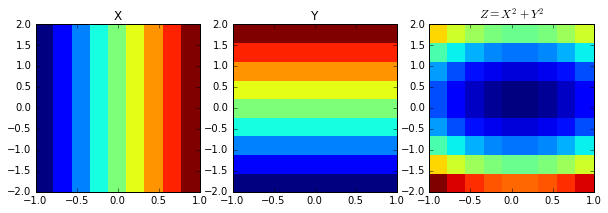

In [32]:
# plot them
plt.figure(figsize=(10,3))
plt.subplot(1,3,1).set_title('X')
plt.pcolormesh(x,y, X)
plt.subplot(1,3,2).set_title('Y')
plt.pcolormesh(x,y, Y)
plt.subplot(1,3,3).set_title('$Z = X^2 + Y^2$')
plt.pcolormesh(x,y, Z)

### Sorting

In [33]:
x = np.random.randint(10, size=10)
print(x)
x.sort() #in-place sort (modifies x)
print(x)

[8 3 3 2 8 9 9 2 0 5]
[0 2 2 3 3 5 8 8 9 9]


In [34]:
x = np.random.randint(10, size=10)
ind = x.argsort()
print("x=", x)
print("sorted indices=", ind)
print("fancy-indexed x=",x[ind])

x= [7 2 5 9 4 5 2 7 2 0]
sorted indices= [9 1 6 8 4 2 5 0 7 3]
fancy-indexed x= [0 2 2 2 4 5 5 7 7 9]


In [35]:
print("original",x)
print("  sorted",np.sort(x))  # non-descructive sort (faster than above)
print("original",x)

original [7 2 5 9 4 5 2 7 2 0]
  sorted [0 2 2 2 4 5 5 7 7 9]
original [7 2 5 9 4 5 2 7 2 0]


### Reshaping

In [36]:
x = np.random.randint(10,size=10)
x

array([8, 3, 7, 0, 1, 2, 7, 4, 5, 5])

In [37]:
x.reshape(2,5)

array([[8, 3, 7, 0, 1],
       [2, 7, 4, 5, 5]])

In [38]:
x.reshape(5,2)

array([[8, 3],
       [7, 0],
       [1, 2],
       [7, 4],
       [5, 5]])

In [39]:
x.reshape(5,5)

ValueError: total size of new array must be unchanged

In [40]:
x.shape = (5,2) # inplace reshape
x

array([[8, 3],
       [7, 0],
       [1, 2],
       [7, 4],
       [5, 5]])

In [41]:
x.ravel() # access a view that is flat , you can also ravel specific dimensions


array([8, 3, 7, 0, 1, 2, 7, 4, 5, 5])

In [42]:
np.arange(100).reshape(10,2,5)  # try using reshape(10,10)

array([[[ 0,  1,  2,  3,  4],
        [ 5,  6,  7,  8,  9]],

       [[10, 11, 12, 13, 14],
        [15, 16, 17, 18, 19]],

       [[20, 21, 22, 23, 24],
        [25, 26, 27, 28, 29]],

       [[30, 31, 32, 33, 34],
        [35, 36, 37, 38, 39]],

       [[40, 41, 42, 43, 44],
        [45, 46, 47, 48, 49]],

       [[50, 51, 52, 53, 54],
        [55, 56, 57, 58, 59]],

       [[60, 61, 62, 63, 64],
        [65, 66, 67, 68, 69]],

       [[70, 71, 72, 73, 74],
        [75, 76, 77, 78, 79]],

       [[80, 81, 82, 83, 84],
        [85, 86, 87, 88, 89]],

       [[90, 91, 92, 93, 94],
        [95, 96, 97, 98, 99]]])

#### transposing

In [43]:
x = np.random.randint(10,size=(5,2))
print(x)
print("----")
print(x.T)

[[6 8]
 [2 9]
 [2 8]
 [3 3]
 [2 8]]
----
[[6 2 2 3 2]
 [8 9 8 3 8]]


***NOTE:*** reshaping or transposing does not modify the original array! It only changes the indexing scheme that is defined by a set of "strides" (offsets in memory) used to access the data (which are part of the NDArray metadata)...


To understand you have to see how NDArrays are implemented in C: the data is a single 1D array (e.g. a contiguous block of memory). When you ask for an index, it simply multiplies the *stride* for each dimension with the index and sums them to get the offset into the array:

In [44]:
x.strides

(16, 8)

In [45]:
x.data

so operations like reversing the array, or reshaping it, just change the stride metadata, and not the array itself!

### Basic mathematics

In [46]:
x = np.random.normal(2.0, size=10000)
x.mean()

2.0083615580900047

In [47]:
x.std()

0.99376791801279818

In [48]:
x.sum()

20083.615580900048

Project over one dimension using the axis attribute

In [49]:
y = np.random.normal(2.0, size=(10,5))
means1 = y.mean(axis=1)
means0 = y.mean(axis=0)
print(y.shape)
print(means0.shape)
print(means0)
print(means1.shape)
print(means1)

(10, 5)
(5,)
[ 1.78572707  2.20203512  1.96606404  2.00148214  2.51321847]
(10,)
[ 1.79013003  1.81499215  2.62044402  1.31218128  2.78625592  2.77849269
  1.98860467  2.11386961  1.86601299  1.86607033]


### Advanced mathematics (and UFuncs)

In [50]:
np.sin(x)

array([-0.31324937,  0.95864914,  0.9663952 , ...,  0.59357881,
        0.66281708,  0.83375333])

In [51]:
x = np.arange(10)
print(x)
print(np.log10(x+1))
print(np.exp(x))
print(x**2)
print(x + 3*x + 2)

[0 1 2 3 4 5 6 7 8 9]
[ 0.          0.30103     0.47712125  0.60205999  0.69897     0.77815125
  0.84509804  0.90308999  0.95424251  1.        ]
[  1.00000000e+00   2.71828183e+00   7.38905610e+00   2.00855369e+01
   5.45981500e+01   1.48413159e+02   4.03428793e+02   1.09663316e+03
   2.98095799e+03   8.10308393e+03]
[ 0  1  4  9 16 25 36 49 64 81]
[ 2  6 10 14 18 22 26 30 34 38]


In [52]:
y = np.random.normal(2.0, size=(10,5))
print("global mean",np.mean(y))
print("mean over y axis", np.mean(y, axis=1))


global mean 2.02325723033
mean over y axis [ 1.86535198  2.36036026  1.44386018  2.20451126  2.14482266  1.46950413
  1.55816394  2.4665636   2.13243945  2.58699483]


#### Why use vector operations? let's implement subtraction for two 2D arrays

In [53]:
def subtract_clike(x,y):
    result = np.empty_like(x)
    for ii in range(x.shape[0]):
        for jj in range(x.shape[1]):
            result[ii,jj] = x[ii,jj] - y[ii,jj]
    return result

def subtract(x,y):
    return x-y

In [54]:
X = np.random.uniform(size=(1000,1000))
Y = np.random.uniform(size=(1000,1000))

In [55]:
r1 = subtract_clike(X,Y)
r2 = subtract(X,Y)
print("sum of difference:",np.sum(r1-r2))

sum of difference: 0.0


In [56]:
%timeit subtract_clike(X,Y)
%timeit subtract(X,Y)

1 loop, best of 3: 577 ms per loop
100 loops, best of 3: 3.71 ms per loop


also, our `subtract` function works for any dimensionality!, not so for the c-like version!

In [57]:
a = np.random.uniform(size=(1000))
b = np.random.uniform(size=(1000))
r1 = subtract(a,b)
r1.shape

(1000,)

In [58]:
r2.shape  # gives wrong answer for 1D array! 
# in fact get some random memory since we used empty() not zeros()

(1000, 1000)

### Broadcasting
combining arrays with different dimensions!

In [59]:
# vector + scalar
np.arange(10) + 5

array([ 5,  6,  7,  8,  9, 10, 11, 12, 13, 14])

Here, the scalar 5 is:
* first 'promoted' to a 1-dimensional array of length 1,
* then, this array is 'stretched' to length 10 to match the first arra

In [60]:
# 2D array     +   1D array
np.ones((3,5)) + np.arange(10,15)

array([[ 11.,  12.,  13.,  14.,  15.],
       [ 11.,  12.,  13.,  14.,  15.],
       [ 11.,  12.,  13.,  14.,  15.]])

In [61]:
np.arange(10,40,10).reshape((3,1)) + np.arange(5)

array([[10, 11, 12, 13, 14],
       [20, 21, 22, 23, 24],
       [30, 31, 32, 33, 34]])

using **newaxis***

In [62]:
X = np.arange(10, 31, 10)
Y = np.arange(5)
print(X)

[10 20 30]


In [63]:
print(X[:, np.newaxis]) # newaxis add another dimension with no data in it!

[[10]
 [20]
 [30]]


In [64]:
X[:, np.newaxis] + Y 

array([[10, 11, 12, 13, 14],
       [20, 21, 22, 23, 24],
       [30, 31, 32, 33, 34]])

### Basic Linear Algebra

In [65]:
M = np.matrix( [[1,2,3], 
                [2,3,4],
                [4,5,6]])
M

matrix([[1, 2, 3],
        [2, 3, 4],
        [4, 5, 6]])

In [66]:
M.T  #transpose

matrix([[1, 2, 4],
        [2, 3, 5],
        [3, 4, 6]])

In [67]:
y = np.matrix([1,0,1]).T

In [68]:
y

matrix([[1],
        [0],
        [1]])

In [69]:
M*y  # matrix multiplication

matrix([[ 4],
        [ 6],
        [10]])

In [70]:
M @ y  # new syntax in Python 3.5 (works also for normal numpy arrays, not "matrix")

matrix([[ 4],
        [ 6],
        [10]])

In [71]:
np.eye(6)  # identity matrix!

array([[ 1.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  1.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  1.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  1.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  1.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  1.]])

matrix multiplication (note this would be different if these were normal np arrays, not `np.matrix`)!

In [72]:
M*M.T   

matrix([[14, 20, 32],
        [20, 29, 47],
        [32, 47, 77]])

In [73]:
M @ M.T  # works generaly for matrices and plain np arrays, but only > py35

matrix([[14, 20, 32],
        [20, 29, 47],
        [32, 47, 77]])

## Plotting

numpy very useful when you want to make plots!

In [74]:
x = np.linspace(0,10,1000) # 1000 points in range 0,10

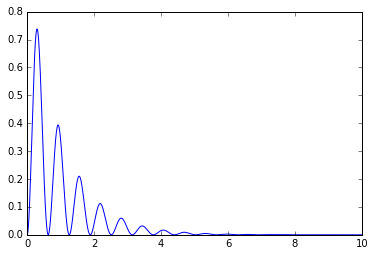

In [75]:
plt.plot( x, np.sin(x*5)**2 * np.exp(-x) )